# <center>Predictive modelling with timeseries</center>
# <center> Part 3 - Time series forecasting with ARIMA models</center>

![Image](images/timeseries.jpg)

# Time series forecasting with ARIMA models

Very robust family of parametric models that can handle time series data with many combinations of properties.
ARIMA models have three components, the `AR` autoregressive, the `I` integrated, and `MA` moving average. the notation is put together as `ARIMA(p, d, q)`.


![Image](images/arima.png) 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# jupyter lab configs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plotly.offline.init_notebook_mode(connected=True)

from utils import adf_test
from utils import print_errors

In [2]:
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima # on order to determine ARIMA orders
from statsmodels.tsa.stattools import adfuller

In [3]:
import pmdarima
pmdarima.__version__
plotly.__version__

'1.8.3'

'5.3.1'

# ETL

### Load the datasets  (Production of electrical equipments)

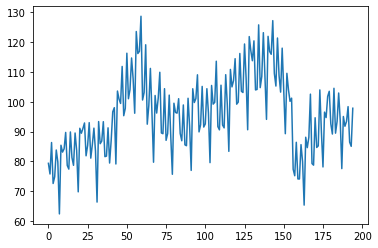

In [5]:
# load a nice example for decomposition - production of electrical equipments
ele_df = pd.read_csv('datasets/elecequip.csv')
ele_df['value'].plot()

---

### Split train and test

In [6]:
train = ele_df.loc[:150, 'value']
test = ele_df.loc[150:, 'value']
test_start = 150
test_end = 194

## Create baseline and check model performance

---

# Auto-regressive family of models

### Is the series  `stationary`?

In [7]:
adf_test(train)

Augmented Dickey-Fuller Test: 
Test the null hypothesis that the data is non-stationary
ADF test statistic       -2.790421
p-value                   0.059655
lags                     14.000000
# observations          136.000000
critical value (1%)      -3.479372
critical value (5%)      -2.883037
critical value (10%)     -2.578234
Fail to reject the null hypothesis, data is  non-stationary


0.05965507262883054

# ARMA - For a stationary series

What happens if we model this as a stationary series?
For ARMA and stationary data, we don't need the Integration/differencing parameter `d`, which is then set to 0.  We are then left with a ARMA model and heve to find the best `p` and `q`.
Let's see the impact of changing `p` and  `q`.

In [8]:
arma_model = ARIMA(train, order=(1,1,1))
results1_1 = arma_model.fit()
results1_1.summary().tables[0]

arma_model = ARIMA(train, order=(2,0,2))
results2_2 = arma_model.fit()
results2_2.summary().tables[0]

arma_model = ARIMA(train, order=(1,0,2))
results1_2 = arma_model.fit()
results1_2.summary().tables[0]

arma_model = ARIMA(train, order=(5,1,1))
results2_1 = arma_model.fit()
results2_1.summary().tables[0]

arma_model2 = ARIMA(train, order=(1,1,1))
results2_1 = arma_model2.fit()
results2_1.summary().tables[0]

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67537D+00    |proj g|=  2.96914D-03

At iterate    5    f=  3.67534D+00    |proj g|=  7.99361D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   0.000D+00   3.675D+00
  F =   3.6753357366464661     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


Dep. Variable:,D.value,No. Observations:,150
Model:,"ARIMA(1, 1, 1)",Log Likelihood,-551.300
Method:,css-mle,S.D. of innovations,9.512
Date:,"Wed, 20 Oct 2021",AIC,1110.601
Time:,14:44:06,BIC,1122.643
Sample:,1,HQIC,1115.493
,,,


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.68384D+00    |proj g|=  5.07658D-02

At iterate    5    f=  3.67024D+00    |proj g|=  2.51195D-03

At iterate   10    f=  3.66926D+00    |proj g|=  3.81118D-04

At iterate   15    f=  3.66876D+00    |proj g|=  4.82223D-03

At iterate   20    f=  3.66625D+00    |proj g|=  1.30522D-03

At iterate   25    f=  3.66624D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     30      1     0     0   

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


 This problem is unconstrained.


Dep. Variable:,value,No. Observations:,151
Model:,"ARMA(2, 2)",Log Likelihood,-553.602
Method:,css-mle,S.D. of innovations,9.412
Date:,"Wed, 20 Oct 2021",AIC,1119.204
Time:,14:44:06,BIC,1137.308
Sample:,0,HQIC,1126.559
,,,


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67262D+00    |proj g|=  3.81365D-02

At iterate    5    f=  3.66637D+00    |proj g|=  9.44520D-03

At iterate   10    f=  3.66606D+00    |proj g|=  1.42162D-03

At iterate   15    f=  3.66422D+00    |proj g|=  1.19883D-02

At iterate   20    f=  3.66320D+00    |proj g|=  2.75469D-04

At iterate   25    f=  3.66320D+00    |proj g|=  4.44089D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     33      1     0     0   

Dep. Variable:,value,No. Observations:,151
Model:,"ARMA(1, 2)",Log Likelihood,-553.143
Method:,css-mle,S.D. of innovations,9.378
Date:,"Wed, 20 Oct 2021",AIC,1116.285
Time:,14:44:06,BIC,1131.372
Sample:,0,HQIC,1122.414
,,,


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.40302D+00    |proj g|=  9.16445D-03


 This problem is unconstrained.



At iterate    5    f=  3.40276D+00    |proj g|=  3.21037D-03

At iterate   10    f=  3.40272D+00    |proj g|=  8.82849D-05

At iterate   15    f=  3.40272D+00    |proj g|=  5.68434D-06

At iterate   20    f=  3.40272D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     23      1     0     0   8.882D-08   3.403D+00
  F =   3.4027243478561875     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


Dep. Variable:,D.value,No. Observations:,150
Model:,"ARIMA(5, 1, 1)",Log Likelihood,-510.409
Method:,css-mle,S.D. of innovations,7.203
Date:,"Wed, 20 Oct 2021",AIC,1036.817
Time:,14:44:06,BIC,1060.902
Sample:,1,HQIC,1046.602
,,,


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67537D+00    |proj g|=  2.96914D-03

At iterate    5    f=  3.67534D+00    |proj g|=  7.99361D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   0.000D+00   3.675D+00
  F =   3.6753357366464661     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


Dep. Variable:,D.value,No. Observations:,150
Model:,"ARIMA(1, 1, 1)",Log Likelihood,-551.300
Method:,css-mle,S.D. of innovations,9.512
Date:,"Wed, 20 Oct 2021",AIC,1110.601
Time:,14:44:06,BIC,1122.643
Sample:,1,HQIC,1115.493
,,,


Let's predict for the test interval:

In [11]:
predictions1 = results1_1.predict(start=test_start, end=test_end).rename('ARMA(1,1) Predictions')
predictions2 = results2_2.predict(start=test_start, end=test_end).rename('ARMA(2,2) Predictions')
predictions3 = results1_2.predict(start=test_start, end=test_end).rename('ARMA(1,2) Predictions')
predictions4 = results2_1.predict(start=test_start, end=test_end).rename('ARMA(5,1) Predictions')

[Text(0, 0.5, 'Demand'), Text(0.5, 0, '')]

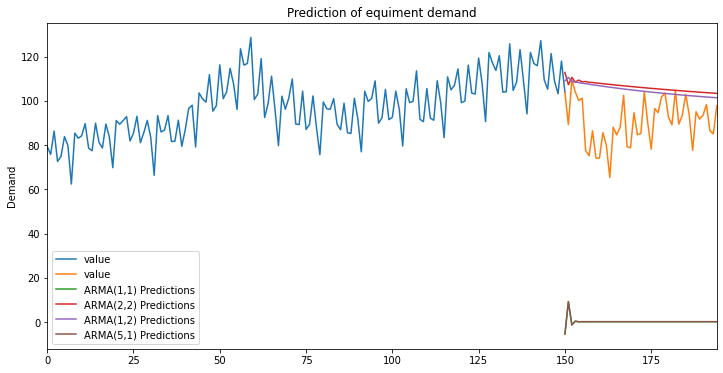

In [12]:
ylabel='Demand'
ax = train.plot(legend=True,figsize=(12,6),title='Prediction of equiment demand')
test.plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions3.plot(legend=True)
predictions4.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel="", ylabel=ylabel)

Did you notice the change in shape of predictions when we increase the AR component to 5?

# Wait a minute!  
## Do we have to try out and plot all possible combinations of (p, d, q)?
![Image](images/boring.jpg) 

## Luckly not.   

### Using AIC and a stewise routine `auto_arima()` made available in library `pmdarima`, we can find the best (p, d, q) for the data

💡 **Check also:** you can check this very nice implementation of a **grid search** of ARIMA models:
[https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/]

# Stepwise ARIMA or SARIMA with `auto_arima()`

The function `auto_arima()` will fit different combinations of the orders of (p, d, q) and select the best based on the **lowest AIC**. You can indicate a seasonal model (SARIMA) if you set `seasonal=True` and change `m` to integer>1.

In [25]:
best_model = auto_arima(train, suppress_warnings=True, 
                        random=False, start_p=0, start_q=0, 
                        stepwise=True,
                        random_state=42, seasonal=True,)
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  151
Model:               SARIMAX(5, 1, 2)   Log Likelihood                -489.950
Date:                Wed, 20 Oct 2021   AIC                            997.900
Time:                        15:00:58   BIC                           1024.995
Sample:                             0   HQIC                          1008.908
                                - 151                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5266      1.412      0.373      0.709      -2.241       3.294
ar.L1         -1.3240      0.083    -16.016      0.000      -1.486      -1.162
ar.L2         -1.7277      0.139    -12.385      0.000      -2.001      -1.454
ar.L3         -1.1565      0.180     -6.420      0.000      -1.510      -0.803
ar.L4         -0.8255      0.136     -6.078      0.000      -1.092      -0.559
ar.L5         -0.4185      0.079     -5.301      0.000      -0.573      -0.264
ma.L1          0.8288      0.047     17.649      0.000       0.737       0.921
ma.L2          0.9046      0.049     18.438      0.000       0.808       1.001
sigma2        36.7160      4.638      7.916      0.000      27.625      45.807
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.98
Prob(Q):                              0.97   Prob(JB):                         0.03
Heteroskedasticity (H):               0.86   Skew:                            -0.52
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### What does it mean? 

The `auto_arima` is telling us that the best model (= lowest AIC) to treat these data is a 
> ARIMA(5, 1, 2) 

*p.s. An SARIMAX or SARIMA without a (P,D,Q)m component is the equivalent of an ARIMA*

### Now, what is the performance on actual test data?

In [26]:
best_model = ARIMA(train, order=(5,1,2))
results = best_model.fit()

# predict
predictions = results.predict(start=test_start, end=test_end, 
                              dynamic=False, typ='levels').rename('SARIMAX(5,1,2) Predictions')

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32582D+00    |proj g|=  7.14344D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      1     21      1     0     0   7.143D+05   3.326D+00
  F =   3.3258198282784202     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



## How is the forecasting looking like in the `test` data?

[Text(0, 0.5, 'Demand'), Text(0.5, 0, '')]

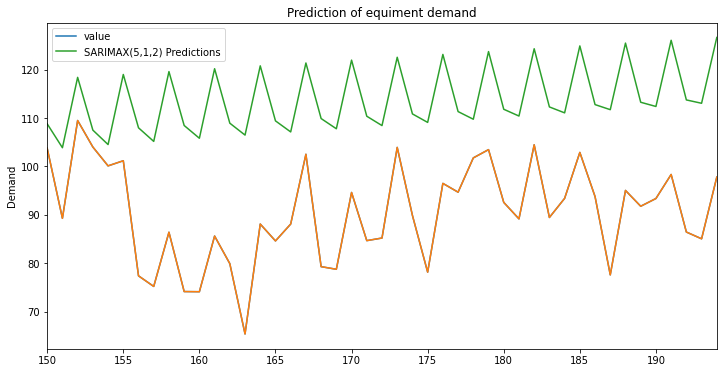

In [15]:
ylabel='Demand'
ax = test.plot(legend=True,figsize=(12,6),title='Prediction of equiment demand')
test.plot()
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel="", ylabel=ylabel)

In [16]:
fig = px.line(test, title="Equipment demand - test data and predictions",  width=900, height=500)
fig.add_trace(go.Line(x=test.index, y=predictions,
                    mode='lines', name='SARIMAX'))
fig.show()

/opt/anaconda3/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## Model evaluation:

In [17]:
print_errors(test, predictions, 'Test set')

ERRORS in Test set
MAE: 23.37235126984812
RMSE: 24.868845672667877
MAPE: 26.70430273902968
RMSPE: 0.29276837484812446


----

### Can we improve our predictions?
# Adding the seasonal component (SARIMA)

In [18]:
best_model = auto_arima(train, suppress_warnings=True, start_p=0, start_q=0, m=6)
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  151
Model:             SARIMAX(3, 1, 0)x(2, 0, [1], 6)   Log Likelihood                -419.957
Date:                             Wed, 20 Oct 2021   AIC                            853.914
Time:                                     14:45:01   BIC                            874.988
Sample:                                          0   HQIC                           862.476
                                             - 151                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3767      0.088     -4.281      0.000      -0.549      -0.204
ar.L2         -0.1994      0.091     -2.203      0.028      -0.377      -0.022
ar.L3          0.1473      0.080      1.831      0.067      -0.010       0.305
ar.S.L6        0.0007      0.035      0.019      0.985      -0.069       0.070
ar.S.L12       0.9110      0.031     29.121      0.000       0.850       0.972
ma.S.L6        0.2883      0.098      2.938      0.003       0.096       0.481
sigma2        13.7317      1.754      7.827      0.000      10.293      17.170
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.98
Prob(Q):                              0.97   Prob(JB):                         0.37
Heteroskedasticity (H):               0.78   Skew:                            -0.26
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
best_model = SARIMAX(train, order=(3,1,0), seasonal_order=(2,0,1,6))
results = best_model.fit()

# predict
predictions = results.predict(start=test_start, end=test_end, 
                              dynamic=False, typ='levels').rename('SARIMAX Predictions')
print_errors(test, predictions, 'Test set')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24799D+00    |proj g|=  8.96787D-02

At iterate    5    f=  2.86451D+00    |proj g|=  3.82601D-01

At iterate   10    f=  2.81052D+00    |proj g|=  4.94899D-03

At iterate   15    f=  2.80662D+00    |proj g|=  2.55396D-02

At iterate   20    f=  2.78785D+00    |proj g|=  2.50404D-02

At iterate   25    f=  2.78118D+00    |proj g|=  1.69951D-03

At iterate   30    f=  2.78117D+00    |proj g|=  2.54654D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


ERRORS in Test set
MAE: 10.668491768560813
RMSE: 12.366728775156261
MAPE: 12.201464127849702
RMSPE: 0.14630181257820515


In [20]:
fig = px.line(test, title="Equipment demand - test data and predictions",  width=900, height=500)
fig.add_trace(go.Line(x=test.index, y=predictions,
                    mode='lines', name='SARIMAX'))
fig.show()

/opt/anaconda3/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




---

# Working with regressors - SARIMA**x**

In [21]:
# training data
rossman_df = pd.read_csv('datasets/rossman_train.csv').reset_index(drop=True)
# set the index to the time column
rossman_df.Date = pd.to_datetime(rossman_df.Date)

# load store info
stores = pd.read_csv('datasets/rossman_store.csv').reset_index(drop=True)

# merge store and sales
rossman_df = pd.merge(rossman_df, stores, how='left', on='Store')
rossman_df = rossman_df[rossman_df.Store==1]

rossman_df.set_index('Date', drop=True, inplace=True)
rossman_df.head(4)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning:

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.



,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2015-07-30,1,4,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2015-07-29,1,3,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2015-07-28,1,2,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


## Basic demonstration of the library usage
We need to add several polishing steps

In [22]:
# Fit a model without any extra regressors
mod = SARIMAX(rossman_df.Sales, order=(1,1,0), seasonal_order=(2,0,1,7))
res = mod.fit(disp=False)
print(res.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency -1D will be used.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency -1D will be used.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.



                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  942
Model:             SARIMAX(1, 1, 0)x(2, 0, [1], 7)   Log Likelihood               -8090.532
Date:                             Wed, 20 Oct 2021   AIC                          16191.064
Time:                                     14:45:05   BIC                          16215.299
Sample:                                          0   HQIC                         16200.302
                                             - 942                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4730      0.016    -30.411      0.000      -0.503      -0.442
ar.S.L7        1.0089   1.0

In [23]:
# add timeseries (endog) and regressors (exog)
endog = rossman_df.Sales
exog = rossman_df.Customers

# Fit the model
mod2 = SARIMAX(endog, exog, order=(1,1,0), seasonal_order=(2,0,1,7))
res = mod2.fit(disp=False)
print(res.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency -1D will be used.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency -1D will be used.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.



                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  942
Model:             SARIMAX(1, 1, 0)x(2, 0, [1], 7)   Log Likelihood               -6750.370
Date:                             Wed, 20 Oct 2021   AIC                          13512.741
Time:                                     14:45:06   BIC                          13541.822
Sample:                                          0   HQIC                         13523.826
                                             - 942                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Customers      8.5555      0.034    249.321      0.000       8.488       8.623
ar.L1         -0.3919      

---

<a href='https://www.freepik.com/vectors/business'>Business vector created by freepik - www.freepik.com</a>